# DBSCAN Clustering

In [302]:
#importa bibliotecas
import os
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import NearestNeighbors

In [303]:
pwd #achar o caminho

'C:\\Users\\neibo'

In [304]:
dataset = pd.read_csv(r"C:\Users\neibo\Documents\clauster.csv") #upload do csv

In [305]:
dataset.head()

,x,y
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [306]:
#divisão dos eixos
X = dataset['x'] 
Y = dataset['y']


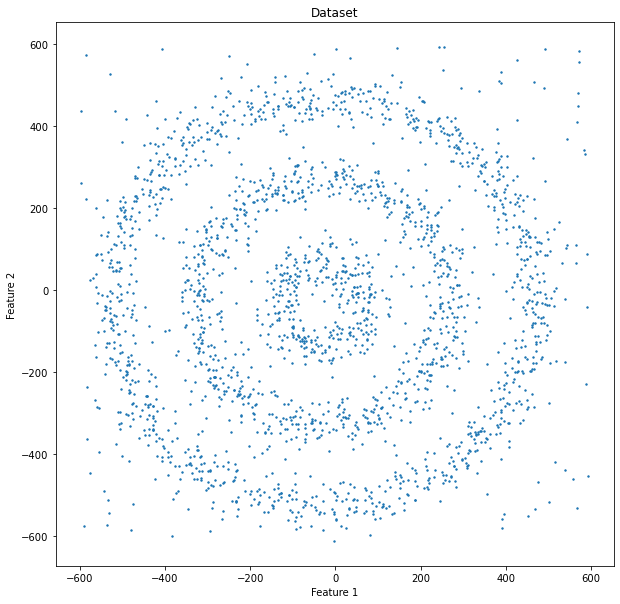

In [307]:
#plot do arquivo sem modificação
plt.figure(figsize=(10,10))
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X,Y,s = 2)

In [308]:
dbscan_cluster=DBSCAN()
dbscan_cluster.fit(dataset[['x','y']])


DBSCAN()

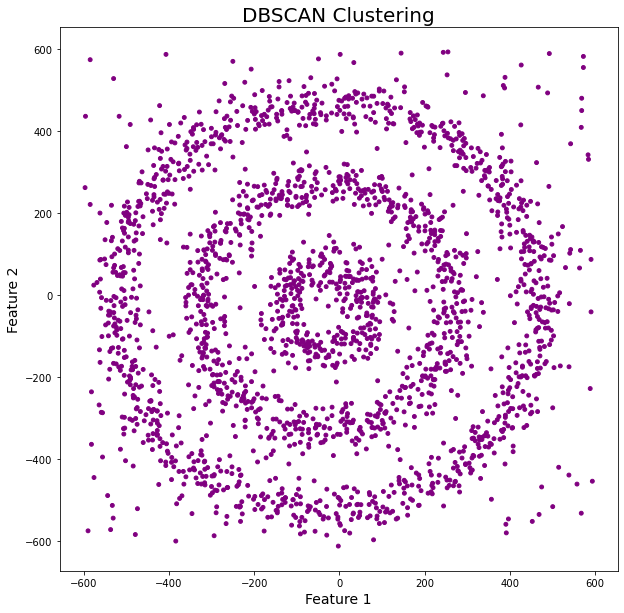

In [309]:
plt.figure(figsize=(10,10))
plt.scatter(dataset['x'],dataset['y'],c=dbscan.labels_,cmap=matplotlib.colors.ListedColormap(['purple','red','blue','green']),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

Os parâmetros padrões não estão adequados, então tudo é considerado "noise".

Para encontrar o valor adequado de eps, usaremos a função "NearestNeighbors" que nos dará uma matriz da distância entre todos os pontos e seus vizinhos mais próximo. 

In [310]:
neigh = NearestNeighbors()
nbrs = neigh.fit(dataset[['x','y']])
distances, indices = nbrs.kneighbors(dataset[['x','y']])

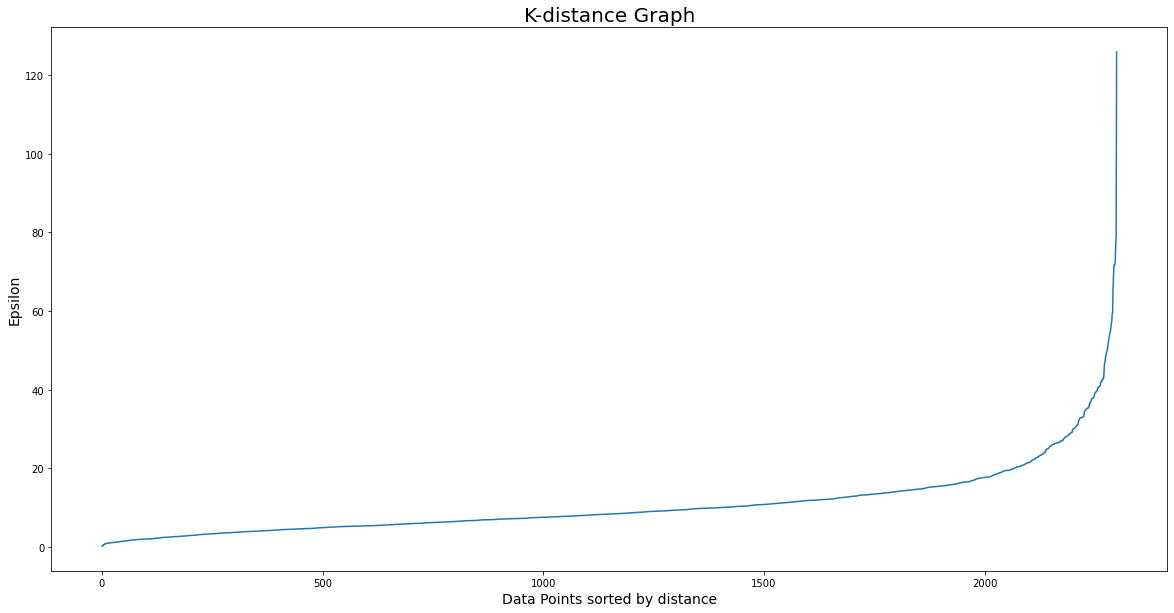

In [311]:
#Plotando a matriz criada em NearestNeighbors obtemos um gráfico chamado
#de K-distance Graph. O valor eps ideal para o nosso dateset é aquele no qual a curva apresenta maior curvatura.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [314]:
#Aproximando epsilon para 33
dbscan_opt=DBSCAN(eps=33)
dbscan_opt.fit(dataset[['x','y']])

DBSCAN(eps=33)

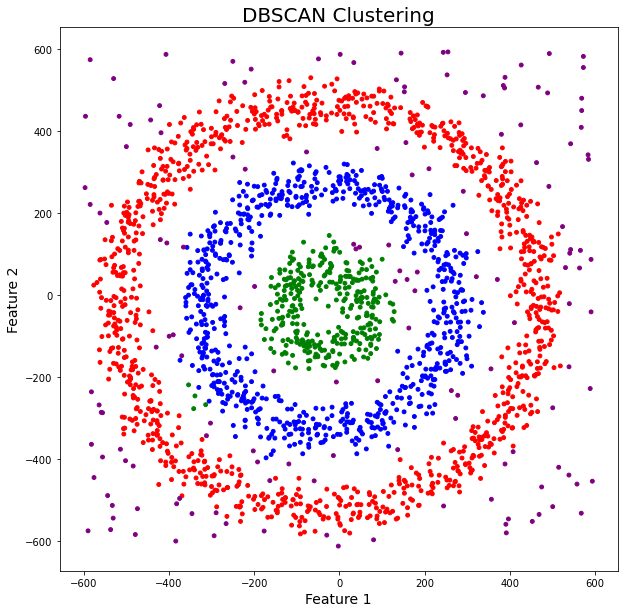

In [315]:
plt.figure(figsize=(10,10))
plt.scatter(dataset['x'],dataset['y'],c=dbscan_opt.labels_,cmap=matplotlib.colors.ListedColormap(['purple','red','blue','green']),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()